Cung cấp bộ dữ liệu Ecoli ecoli.csv trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/1011) với 8 features và bảng kết quả run (https://www.openml.org/t/3874) đã được thực hiện để tham khảo.
### Yêu cầu:
Hãy chọn thuật toán phù hợp để xây dựng model dự đoán một mẫu có binaryClass là positive(“P”) hay negative (“N”). Giải thích lý do tại sao bạn chọn thuật toán này?
Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('../../Data/ecoli.csv')
df.shape

(336, 8)

In [3]:
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,binaryClass
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,P
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,P
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,P
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,P
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,P


In [4]:
df.tail()

,mcg,gvh,lip,chg,aac,alm1,alm2,binaryClass
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,N
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,N
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,N
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,N
335,0.74,0.74,0.48,0.5,0.31,0.53,0.52,N


In [5]:
df.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mcg          336 non-null    float64
 1   gvh          336 non-null    float64
 2   lip          336 non-null    float64
 3   chg          336 non-null    float64
 4   aac          336 non-null    float64
 5   alm1         336 non-null    float64
 6   alm2         336 non-null    float64
 7   binaryClass  336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [7]:
X = df[['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']]
y = df['binaryClass']

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Tính độ chính xác theo: DecisionTree, RandomForest, Logistic, Naive Bayes, SVM,
from sklearn.model_selection import cross_val_score
models = [
    KNeighborsClassifier(n_neighbors=6),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=30),
    SVC(kernel='linear'),
    GaussianNB(),
    LogisticRegression(solver='lbfgs', multi_class='auto')
]
CV = 10 # số lần lặp
# lưu kết quả acc của 6 model, mỗi model 10 giá trị acc
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # lưu 2 thông tin là model_name và accuracies.mean()

for model in models: # duyệt từng model trong ds model
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
    entries.append([model_name, accuracies.mean()])
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

In [10]:
cv_df.sort_values('accuracy', ascending=False)

,model_name,accuracy
0,KNeighborsClassifier,0.958289
3,SVC,0.952496
5,LogisticRegression,0.952496
2,RandomForestClassifier,0.952228
1,DecisionTreeClassifier,0.916221
4,GaussianNB,0.662032


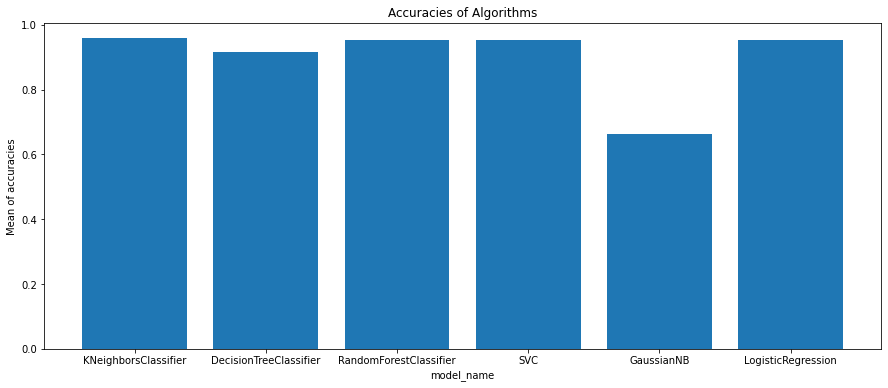

In [11]:
plt.figure(figsize=(15,6))

plt.bar(cv_df['model_name'],cv_df['accuracy'], )
plt.xlabel('model_name')
plt.ylabel('Mean of accuracies')
plt.title("Accuracies of Algorithms")
plt.show()

### Thuật toán khả thi
* Random Forest
* KNeighbors
* SVC
* Logistic Regression

In [12]:
X = df[['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']]
y = df['binaryClass']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
def create_model(clf, X_train, X_test, y_train, y_test):
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")
    # Kiểm tra độ chính xác
    print("The Training prediction accuracy is: ", clf.score(X_train,y_train)*100,"%")
    print("The Testing prediction accuracy is: ", clf.score(X_test,y_test)*100,"%")
    print("\n Confusion Matrix \n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return model

# Random Forest

In [15]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model = create_model(RF_model, X_train, X_test, y_train, y_test)

Accuracy: 94.04761904761905 %
The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  94.04761904761905 %

 Confusion Matrix 
 [[41  3]
 [ 2 38]]
              precision    recall  f1-score   support

           N       0.95      0.93      0.94        44
           P       0.93      0.95      0.94        40

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



### Kết luận: model overfitting nhẹ

In [16]:
feature_imp = pd.Series(RF_model.feature_importances_, index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

alm1    0.368262
mcg     0.259589
alm2    0.188230
gvh     0.123883
aac     0.055882
lip     0.003783
chg     0.000370
dtype: float64

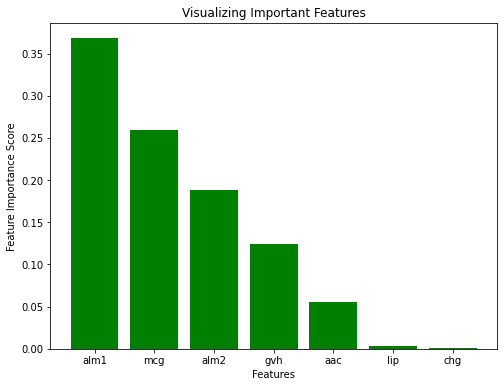

In [17]:
# Creating a bar plot
plt.figure(figsize=(8,6))
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

### Thử loại bỏ aac, lip và chg

In [18]:
X_new = df[['mcg', 'gvh', 'alm1', 'alm2']]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, random_state=42)

In [19]:
RF_model_new = RandomForestClassifier(n_estimators=100)
RF_model_new = create_model(RF_model_new, X_train_new, X_test_new, y_train_new, y_test_new)

Accuracy: 94.04761904761905 %
The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  94.04761904761905 %

 Confusion Matrix 
 [[41  3]
 [ 2 38]]
              precision    recall  f1-score   support

           N       0.95      0.93      0.94        44
           P       0.93      0.95      0.94        40

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



### Model có cải thiện nhưng vẫn overfitting

# KNeighbors

In [20]:
list_k = []
list_acc = []
for K_value in range(2,int((y_train.shape[0]**0.5)/2)):
#for K_value in range(2,10):
    list_k.append(K_value)
    neigh = KNeighborsClassifier(n_neighbors=K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    list_acc.append(acc)
    print("k = ", K_value,": Accuracy is ", accuracy_score(y_test, y_pred))

k =  2 : Accuracy is  0.9285714285714286
k =  3 : Accuracy is  0.9523809523809523
k =  4 : Accuracy is  0.9404761904761905
k =  5 : Accuracy is  0.9523809523809523
k =  6 : Accuracy is  0.9404761904761905


### k=5 cho độ chính xác cao nhất

In [21]:
KN_model = KNeighborsClassifier(n_neighbors=5)
KN_model = create_model(RF_model, X_train, X_test, y_train, y_test)

Accuracy: 94.04761904761905 %
The Training prediction accuracy is:  100.0 %
The Testing prediction accuracy is:  94.04761904761905 %

 Confusion Matrix 
 [[41  3]
 [ 2 38]]
              precision    recall  f1-score   support

           N       0.95      0.93      0.94        44
           P       0.93      0.95      0.94        40

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



### Không cải thiện so với random forest